<a href="https://colab.research.google.com/github/dheagitawijaya/UAS-AI/blob/main/klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Obesitas menggunakan KNN
# Dibuat oleh : Dhea Gitawijaya
# 312110098
# TI.21.B.SE.2


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
 # untuk access raw file content
fdata = "https://raw.githubusercontent.com/dheagitawijaya/UAS-AI/refs/heads/main/dataset/obesity.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [62]:
# Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")

# Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

df.head()

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [63]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [66]:
from sklearn.model_selection import train_test_split

y = df.Label
X = df.drop('Label', axis=1)

In [68]:
# Split data kedalam training dan testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

In [69]:
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [70]:
# Import the StandardScaler class from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder



In [71]:
# Pilih kolom numerik untuk distandarisasi
numeric_columns = x_train.select_dtypes(include=['float64', 'int64']).columns

# Standardisasi hanya kolom numerik
scl = StandardScaler()
x_train_scl = scl.fit_transform(x_train[numeric_columns])
x_test_scl = scl.transform(x_test[numeric_columns])

# Untuk kolom non-numerik, Anda bisa menggunakan LabelEncoder atau OneHotEncoder jika diperlukan
lbl_encoder = LabelEncoder()
y_train_enc = lbl_encoder.fit_transform(y_train)
y_test_enc = lbl_encoder.transform(y_test)


In [72]:
x_train

,ID,Age,Gender,Height,Weight,BMI
23,25,83,Female,150,50,20.0
1,2,30,Female,160,60,22.5
100,103,47,Female,130,30,13.3
14,15,38,Male,190,90,27.3
93,96,12,Male,175,15,5.6
...,...,...,...,...,...,...
91,94,53,Male,210,55,21.2
53,56,92,Female,140,65,22.7
107,110,31,Male,190,20,8.3
44,47,47,Male,200,95,27.0


In [73]:
x_train_scl

array([[-0.93691507,  1.43597601, -0.53427884, -0.35651497, -0.09650318],
       [-1.65244326, -0.7001789 , -0.18218704, -0.00810261,  0.23814496],
       [ 1.48965879, -0.01499714, -1.23846245, -1.05333969, -0.9933602 ],
       [-1.24801429, -0.37774043,  0.87408838,  1.03713447,  0.88066939],
       [ 1.27188934, -1.42566548,  0.34595067, -1.57595824, -2.02407648],
       [ 0.08971233,  2.2017674 , -1.23846245,  0.51451593,  0.5727931 ],
       [-1.68355318, -0.90170295,  0.34595067,  0.68872211,  0.61295087],
       [-0.56359602,  0.06561248,  1.22618018,  1.55975301,  1.0948442 ],
       [ 0.80524052, -1.34505586,  0.34595067, -0.87913351, -0.53823873],
       [ 1.11633973, -0.37774043, -0.88637065, -0.87913351, -0.53823873],
       [ 1.42743895, -0.41804524, -0.88637065, -1.22754588, -1.43509575],
       [-0.43915633, -1.22414143,  0.34595067,  0.16610357,  0.26491681],
       [ 1.61409848, -1.26444624, -0.18218704, -1.75016442, -2.25163721],
       [-1.21690436, -0.17621638, -0.8

In [74]:
y_train

,Label
23,Underweight
1,Normal Weight
100,Underweight
14,Overweight
93,Underweight
...,...
91,Normal Weight
53,Normal Weight
107,Underweight
44,Overweight


In [75]:
y_train_enc

array([3, 0, 3, 2, 3, 2, 0, 1, 3, 3, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3, 2, 3,
       2, 0, 1, 0, 0, 3, 3, 3, 2, 1, 3, 3, 3, 2, 2, 1, 3, 2, 3, 0, 1, 3,
       3, 3, 1, 3, 2, 1, 3, 0, 0, 3, 1, 0, 1, 2, 0, 3, 3, 3, 0, 3, 3, 2,
       2, 0, 3, 3, 3, 0, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 3, 2, 0])

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 0.82


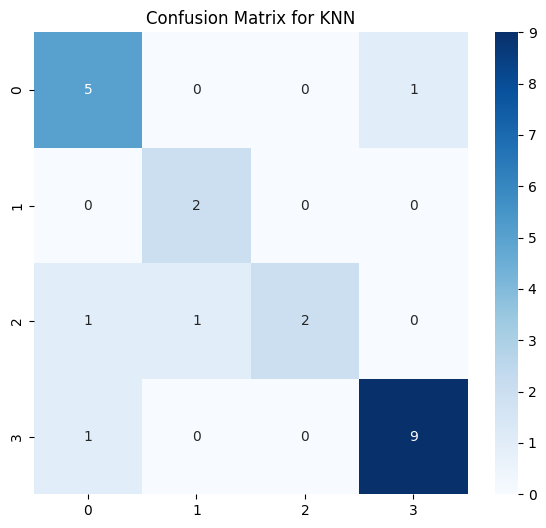

In [84]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show ()

In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[0.77777778 0.88235294 0.76470588 0.70588235 0.76470588]
Rata score dengan 5 fold : 0.7790849673202614


In [88]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

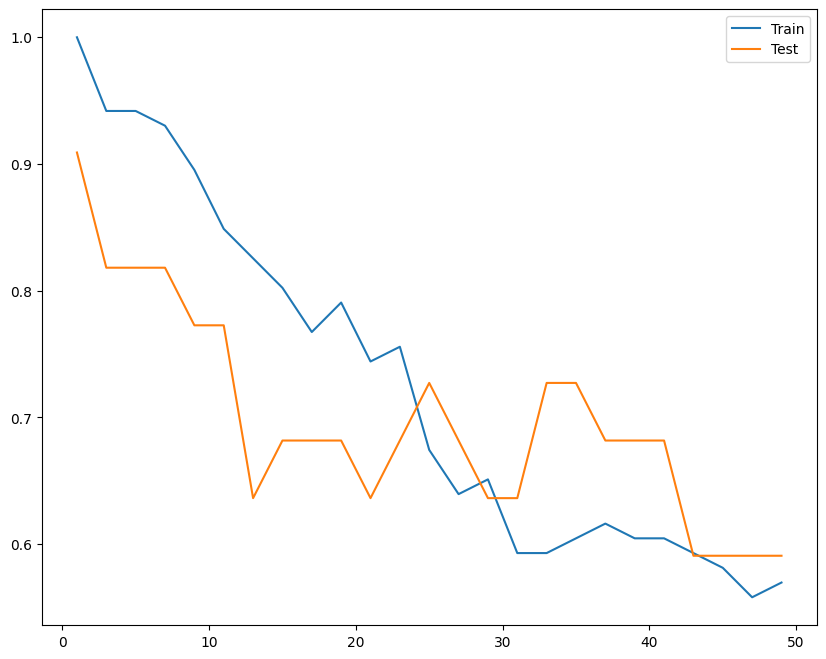

In [89]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [90]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 0.9090909090909091
K Neighboard terbaik adalah 1
